## Exploratory Data Analysis 

In [2]:
#importing the various libraries that will be use on the hotel bookings dataset 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

The above lines of code imports the various libraries that will be use through this project

In [3]:
bookings_df = pd.read_csv('hotel_bookings.csv', header = 0)
print(bookings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Here is the Information on the 32 variables that are in hotel Bookings dataset that we will be working with
throughout this project.

In [4]:
print(bookings_df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

## Data Cleaning

In [5]:
#Null can not be identify using ISNULL function 
df2 = bookings_df.isnull().any()
print(df2)


hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [6]:
#Replace 'Null/Na' to format which is identifiable 
bookings_df=bookings_df.replace('NULL',np.nan)
df3 = bookings_df.isnull().any().head(15)
print(df3)

hotel                        False
is_canceled                  False
lead_time                    False
arrival_date_year            False
arrival_date_month           False
arrival_date_week_number     False
arrival_date_day_of_month    False
stays_in_weekend_nights      False
stays_in_week_nights         False
adults                       False
children                      True
babies                       False
meal                         False
country                       True
market_segment               False
dtype: bool


In [7]:
#Get variables with null values 
print('Top Variables with missing values')
print(bookings_df.isnull().sum().sort_values(ascending=False).head(5))

Top Variables with missing values
company      112593
agent         16340
country         488
children          4
lead_time         0
dtype: int64


In [8]:
#Agent and Company have id number, however when booking is done direct by individual a 'NULL' is used for representation.
#This case '0' will be use for bookings that were done directly by guest
#Booking for unknown countries will be represented by 'UNK'
#Children with null value will be replace by 0
subs = {'company': 0, 'agent' : 0,
                'country' : 'UNK',
                'children' : 0
               }
bookings_df = bookings_df.fillna(value = subs)
print(bookings_df.isnull().sum().sort_values(ascending=False).head(5))

reservation_status_date    0
reservation_status         0
is_canceled                0
lead_time                  0
arrival_date_year          0
dtype: int64


The dataset is now clean and ready for exploration

## Problem Analysis

Hotels in Portugal have experienced high cancelation volume which had affect the optimization of hotels rooms. Therefore, in order to maximize revenue per room and minimize loss due to cancellation, hotel operator would like to be able to predict whether a given reservation is likely to canceled or not? With this information, hotel operator might be able to take proactive  measure to that might help to reduce cancelation.

Durin Exploratory Data Analysis I'll try to answer.

Prediction of reservation cancellation likelihood?

What are the key drivers behind hotel Bookings cancelations?

How accurate is the post data prediction?

Does lead time has relation with cancellation?

what is relation with lead time, hotels and cancelation.

Which countries are likely to cancel reservation? (rank my top 10 countries)

Assigned room VS cancellation?

Customer type vs cancellation?

Total Bookings vs cancelation over the year

Which market segment has high rate of cancellation?

What is the cancelation rate for repeat guest who had canceled before and those who had not canceled before?

 


# Descriptive Statistics

(0.0, 100.0)

<Figure size 432x288 with 0 Axes>

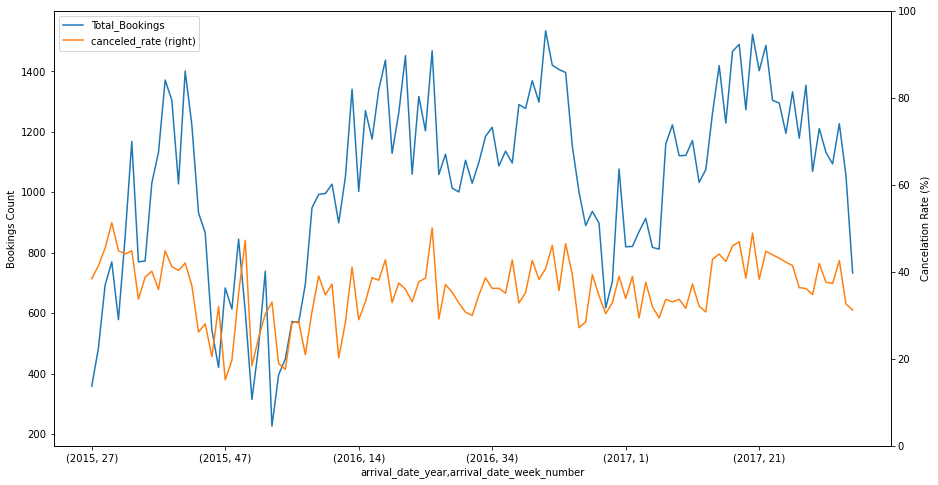

In [303]:
time_trend = bookings_df.groupby(['arrival_date_year','arrival_date_week_number']).agg(canceled =('is_canceled','sum'),Total_Bookings =('is_canceled','count'))
time_trend['canceled_rate'] = (time_trend['canceled']/time_trend['Total_Bookings'])*100
drp = time_trend.drop(['canceled'], axis=1)
plt.figure()
ax = drp.plot(secondary_y='canceled_rate', figsize=(15,8))
ax.set_ylabel('Bookings Count')
ax.right_ax.set_ylabel('Cancelation Rate (%)')
ax.right_ax.set_ylim(0,100)

The above chart showing the trend of booking reservations and canceled bookings on weekly basis.During the course of 2015 there cancelations and totat bookings has consistently close gap. however, has for 2016 to 2017 the margin between cancleation and bookings has widen and remained as throughout the time period. The 27th week in 2015 recorded the highest cancelation rate.

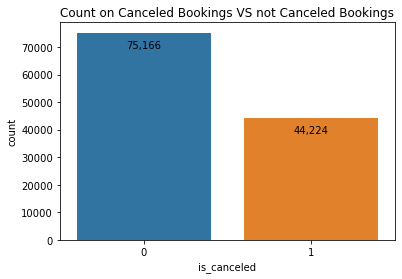

In [302]:
#Visiual on bookings that were not cancel vs Bookings that were canceled
splot=sns.countplot(x="is_canceled", data=bookings_df)
for p in splot.patches:
    splot.annotate("{:,}".format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
splot.set_title('Count on Canceled Bookings VS not Canceled Bookings')
plt.show()

'0'represents the bookings that were not canceled and '1' represents canceled bookings. There was of a total of 119,390 bookings, out of which 44,224 was canceled and 75,166 was not canceled 


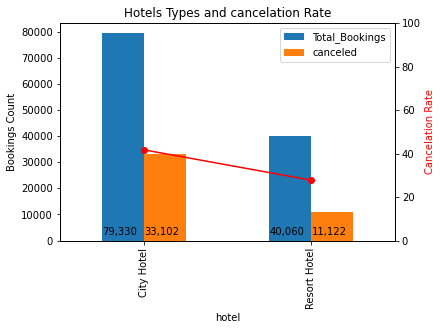

In [301]:
hotels = bookings_df.groupby('hotel').agg(Total_Bookings =('is_canceled','count'),canceled =('is_canceled','sum'))
hotels['canceled rate'] = (hotels['canceled']/hotels['Total_Bookings'])*100

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

ax = hotels.plot(kind='bar',y=['Total_Bookings','canceled'], ax=ax0)
ax.set_title("Hotels Types and cancelation Rate")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() * 1.005,2000))
            
ax = hotels.plot(kind='line',y='canceled rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
plt.ylim(0,100)
ax.set_ylabel("Cancelation Rate", color='red')

plt.show()
plt.close()

The above bar graph shows the total amount of bookings for both hotels along with total cancelations. 66% of booking was done with City Hotel and 42% of those got canceled. Resort Hotel got only 28% of its total booking canceled.   

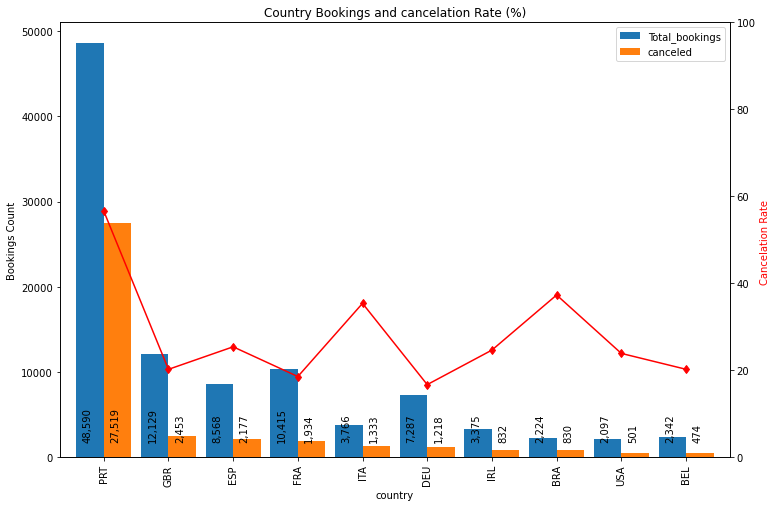

In [300]:
country_df = bookings_df.groupby('country').agg(Total_bookings=('is_canceled','count'),canceled =('is_canceled','sum')).reset_index()
country_df['cancelation_rate'] = (country_df['canceled']/country_df['Total_bookings'])*100
top_country = country_df.sort_values(by=['canceled'], ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

ax = top_country.plot(kind='bar',x='country', y=['Total_bookings','canceled'], ax=ax1, width=0.85)
ax.set_title("Country Bookings and cancelation Rate (%)")
ax.set_ylabel("Bookings Count")

for p in ax1.patches:
    ax1.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)

ax1 = top_country.plot(kind='line',x='country',y='cancelation_rate', marker='d',color='red', ax=ax2, legend=False)
plt.ylim(0,100)
ax1.set_ylabel("Cancelation Rate ", color='red')

for p in ax2.patches:
    ax2.annotate("{:,}".format(p.get_height()), (p.get_x() * 1.005,2000))


plt.show()

1. PRT(Portugal) has recorded over 27k cancelation and has the highest(nearly 60%) cancelation rate of all the top countries. This extremely high comparing to the top 10 countries that recorded under 3k canceled bookings.
2. Cancelation rate accoss the top 10 countries varies irrespective of total bookings. There is a low correlation coefficient of 0.039 between total bookings and cancelation rate.  


In [298]:
country_df.corr()

,Total_bookings,canceled,cancelation_rate
Total_bookings,1.000000,0.969765,0.039476
canceled,0.969765,1.000000,0.060596
cancelation_rate,0.039476,0.060596,1.000000


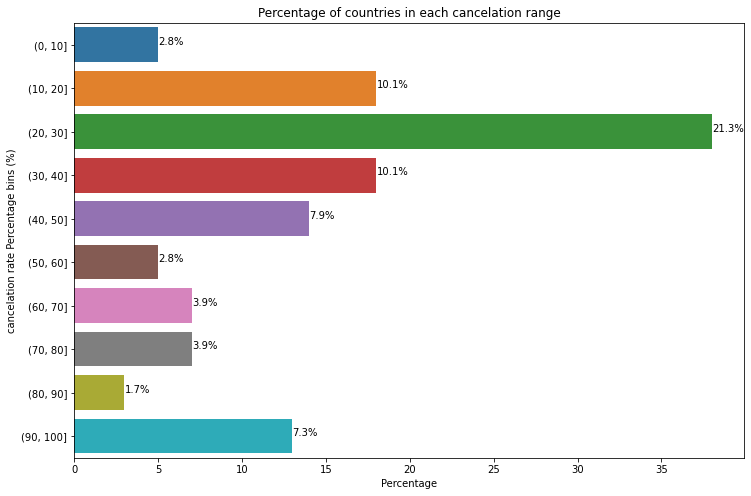

In [297]:
country_df['binned']=pd.cut(x=country_df['cancelation_rate'], bins=[0,10,20,30,40,50,60,70,80,90, 100])

fig, ax= plt.subplots(figsize =(12,8))
ax = sns.countplot(y="binned", data=country_df)
ax.set_title('Percentage of countries in each cancelation range')
ax.set_xlabel('Percentage')
ax.set_ylabel('cancelation rate Percentage bins (%)')


total = len(country_df['binned'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

More than 55% of all the countries experienced cancelation rate that is 50% or less. 21.5% of countries that has cancelation rate between 20%-30% which the bin that has the  highest rate.

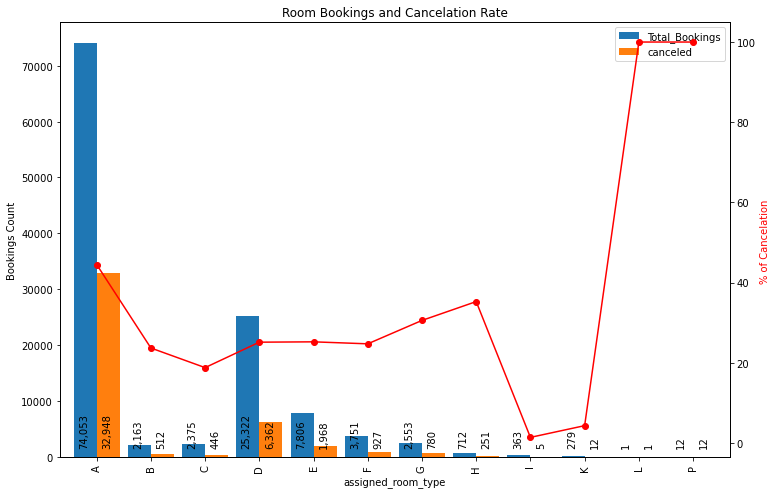

In [293]:
rooms = bookings_df.groupby('assigned_room_type').agg(Total_Bookings =('is_canceled','count'),canceled =('is_canceled','sum'))
rooms['canceled rate'] = (rooms['canceled']/rooms['Total_Bookings'])*100
fig0, ax0 = plt.subplots(figsize=(12, 8))
ax1 = ax0.twinx()

ax = rooms.plot(kind='bar',y=['Total_Bookings','canceled'], ax=ax0, width = 0.85)
ax.set_title("Room Bookings and Cancelation Rate")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)
            
ax = rooms.plot(kind='line',y='canceled rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
ax.set_ylabel("% of Cancelation ", color='red')

plt.show()

The above bar graph shows the total amount of canceled bookings by assigned Room. Room A was assigned the most and it also has the most number of cancelations,howevver, its cancelation rate is the third highest of all room.  Rooms L and P both a 100% cancelation rate.

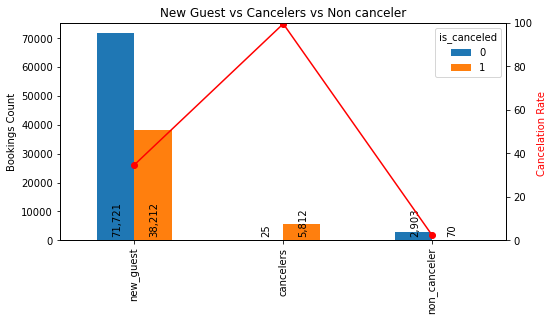

In [292]:
newg =bookings_df[(bookings_df['previous_cancellations'] == 0) & (bookings_df['previous_bookings_not_canceled'] ==0) ]
ng = newg.groupby('is_canceled').agg( new_guest=('is_canceled','count')).reset_index()

canceler =bookings_df[(bookings_df['previous_cancellations'] > 0) & (bookings_df['previous_bookings_not_canceled'] ==0) ]
cr = canceler.groupby('is_canceled').agg( cancelers=('is_canceled','count')).reset_index()

noncanceler =bookings_df[(bookings_df['previous_cancellations'] == 0) & (bookings_df['previous_bookings_not_canceled'] >0) ]
ncr = noncanceler.groupby('is_canceled').agg( non_canceler=('is_canceled','count')).reset_index()

cans = ng.merge(cr.merge( ncr, on = "is_canceled", how = "inner"), on = "is_canceled", how = "inner")
cans.set_index('is_canceled', inplace=True)
fix_cans = cans.transpose()


fix_cans['cancelation_rate'] = (fix_cans[1] / (fix_cans[0] + fix_cans[1]) ) * 100 

fig0, ax0 = plt.subplots(figsize=(8,4))

ax1 = ax0.twinx()

ax =fix_cans.plot(kind='bar',y=[0,1], ax=ax0)
ax.set_title("New Guest vs Cancelers vs Non canceler")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)
            
ax = fix_cans.plot(kind='line',y='cancelation_rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
plt.ylim(0,100)
ax.set_ylabel("Cancelation Rate ", color='red')

plt.show()
plt.close()


BooKings by guests with pervious cancelations revealed a 99.5% cancelation rate. Repeated guests with no pervious cancelations revealed 2.4% cancelation rate. New guests has 35% cancelation rate.

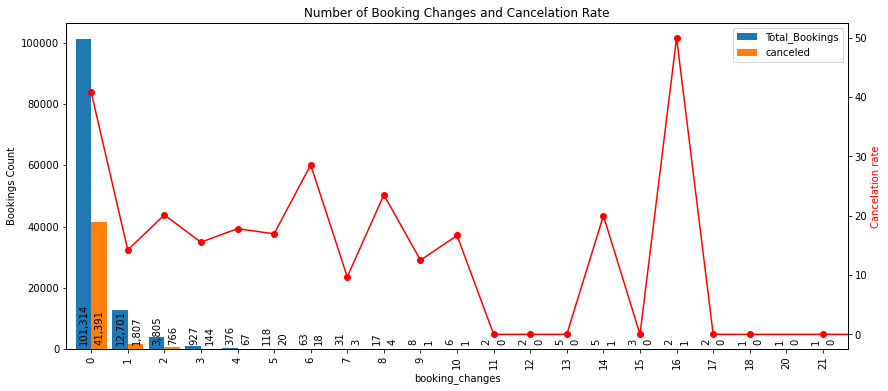

In [291]:
changes = bookings_df.groupby('booking_changes').agg(Total_Bookings =('is_canceled','count'),canceled =('is_canceled','sum'))
changes['canceled rate'] = (changes['canceled']/changes['Total_Bookings'])*100
fig0, ax0 = plt.subplots(figsize=(14, 6))
ax1 = ax0.twinx()

ax = changes.plot(kind='bar',y=['Total_Bookings','canceled'], ax=ax0, width = 0.85)
ax.set_title("Number of Booking Changes and Cancelation Rate")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)
            
ax = changes.plot(kind='line',y='canceled rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
ax.set_ylabel("Cancelation rate", color='red')

plt.show()

As quests request more changes to their ressevation, it is observated that there is a less possibility that they will cancel. Notably, bookings with no change experienced very high cancelations rate.

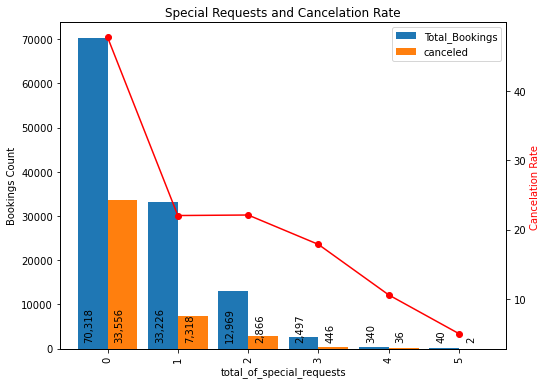

In [290]:
requests = bookings_df.groupby('total_of_special_requests').agg(Total_Bookings =('is_canceled','count'),canceled =('is_canceled','sum'))
requests['canceled rate'] = (requests['canceled']/requests['Total_Bookings'])*100
fig0, ax0 = plt.subplots(figsize=(8, 6))
ax1 = ax0.twinx()

ax = requests.plot(kind='bar',y=['Total_Bookings','canceled'], ax=ax0, width = 0.85)
ax.set_title("Special Requests and Cancelation Rate")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)
            
ax = requests.plot(kind='line',y='canceled rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
ax.set_ylabel("Cancelation Rate ", color='red')

plt.show()

Almost half of all quests who do not have a speacial request canceled. It is evidence that quests with 1 or more special request is unlike to cancel. 

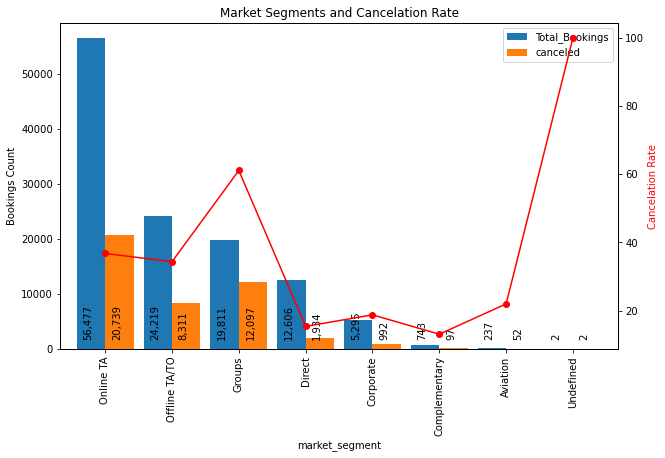

In [289]:
#The different market segments and cancelation rate
market = bookings_df.groupby('market_segment').agg(Total_Bookings =('is_canceled','count'),canceled =('is_canceled','sum'))
market['canceled rate'] = (market['canceled']/market['Total_Bookings'])*100
fig0, ax0 = plt.subplots(figsize=(10, 6))
ax1 = ax0.twinx()

ax = market.sort_values('Total_Bookings', ascending=False).plot(kind='bar',y=['Total_Bookings','canceled'], ax=ax0, width = 0.85)
ax.set_title("Market Segments and Cancelation Rate")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)
            
ax = market.sort_values('Total_Bookings', ascending=False).plot(kind='line',y='canceled rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
ax.set_ylabel("Cancelation Rate", color='red')

plt.show()

The above chart shows the total bookings, number of cancelations and the cancelation rate for each Market segments. Undefined market segment has 100% cancelation rate.Group Market segment cancelation rate is over 60%; the hightest amount top the booking market segments. However, other low booking market segments such as Aviation, complementary, corporate and Direct all experienced cancelation rate under 25%

In [12]:
#Have Lead time place into bins and get counts
bins = pd.cut(bookings_df['lead_time'],[0, 30, 90, 180, 365,540,700])
group_lead = bookings_df.groupby(bins).agg( bookings=('is_canceled','count'),canceled =('is_canceled','sum')).reset_index()
group_lead['not_canceled']= group_lead['bookings'] - group_lead['canceled']

lead = group_lead.drop(['bookings'], axis=1)
lead = lead[["lead_time", "not_canceled", "canceled"]]
lead.set_index('lead_time', inplace=True)
lead['cancelation_rate'] = (lead['canceled'] / (lead['not_canceled'] + lead['canceled']) ) * 100
print(lead)


            not_canceled  canceled  cancelation_rate
lead_time                                           
(0, 30]            25606      6755         20.873891
(30, 90]           18412     11141         37.698372
(90, 180]          14618     11821         44.710466
(180, 365]          9597     11947         55.453955
(365, 540]           993      1849         65.059817
(540, 700]            23       281         92.434211


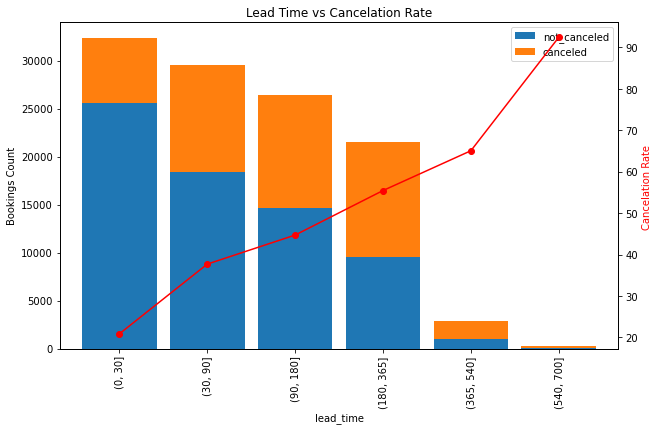

In [282]:
fig0, ax0 = plt.subplots(figsize=(10, 6))
ax1 = ax0.twinx()

ax = lead.plot(kind='bar',y=['not_canceled','canceled'],stacked=True, ax=ax0, width = 0.85)
ax.set_title("Lead Time vs Cancelation Rate")
ax.set_ylabel("Bookings Count")
            
ax = lead.plot(kind='line',y='cancelation_rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
ax.set_ylabel("Cancelation Rate ", color='red')

plt.show()

Bookings that occured less than 1 month prior to arrival date are less likely to be canceled(21%). Bookings that were done between 1 month to 3 months before arrival date got 38% cancelation rate. Bookings after 6 months has signifcantly high cancelations rate. Over 57% of bookings after 6 months were canceled. Overall, as lead time increase so those the rate of cancelations.  

Text(0.5, 1.0, 'Lead Time for Hotels')

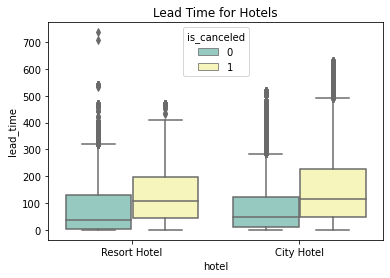

In [9]:
leading = bookings_df[['hotel','is_canceled', 'lead_time']]

ax = sns.boxplot(x="hotel", y="lead_time", hue="is_canceled",
                 data=leading, palette="Set3")
ax.set_title('Lead Time for Hotels')

Cancelation for both hotel types are greatly associated with long lead time. Bookings with short lead time are less likely to cancel reservation. 

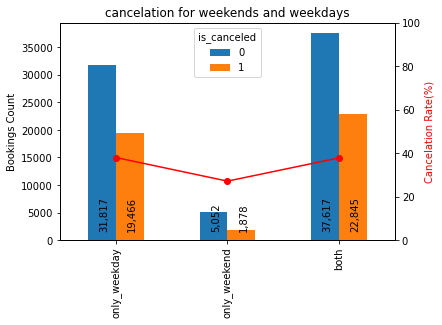

In [280]:
weekn_only =bookings_df[(bookings_df['stays_in_weekend_nights'] > 0) & (bookings_df['stays_in_week_nights'] ==0) ]
wn = weekn_only.groupby('is_canceled').agg( only_weekend=('stays_in_weekend_nights','count')).reset_index()

weekday_only =bookings_df[(bookings_df['stays_in_weekend_nights'] == 0) & (bookings_df['stays_in_week_nights'] > 0) ]
wd = weekday_only.groupby('is_canceled').agg( only_weekday=('stays_in_weekend_nights','count')).reset_index()

both =bookings_df[(bookings_df['stays_in_weekend_nights'] > 0) & (bookings_df['stays_in_week_nights'] > 0) ]
bt = both.groupby('is_canceled').agg( both=('stays_in_weekend_nights','count')).reset_index()

stay = wd.merge(wn.merge( bt, on = "is_canceled", how = "inner"), on = "is_canceled", how = "inner")
stay.set_index('is_canceled', inplace=True)
fix_stay = stay.transpose()

fix_stay['cancelation_rate'] = (fix_stay[1] / (fix_stay[0] + fix_stay[1]) ) * 100 

fig0, ax0 = plt.subplots()

ax1 = ax0.twinx()

ax =fix_stay.plot(kind='bar',y=[0,1], ax=ax0)
ax.set_title("cancelation for weekends and weekdays")
ax.set_ylabel("Bookings Count")

for p in ax0.patches:
    ax0.annotate("{:,}".format(p.get_height()), (p.get_x() + 0.1,2000), rotation = 90)
            
ax = fix_stay.plot(kind='line',y='cancelation_rate', secondary_y=True, marker= 'o',color = 'red', ax=ax1, legend=False )
plt.ylim(0,100)
ax.set_ylabel("Cancelation Rate(%)", color='red')

plt.show()
plt.close()


Bookings on weekend only has the lowest rate of cancelation(27%). Bookings for only weekdays has a 37% cancelation rate. This similar for bookings that included both weekends and weekdays.

# Inferential Statistics

In [7]:
#Calculate information values for each variable.
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []
    
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)calc_iv(bookings_df,'arrival_date_month', 'is_canceled', pr=False)

    return iv

In [8]:
dct = {}
for i in bookings_df: 
    dct[i] = calc_iv(bookings_df,i, 'is_canceled', pr=False)


C:\Users\clayb\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


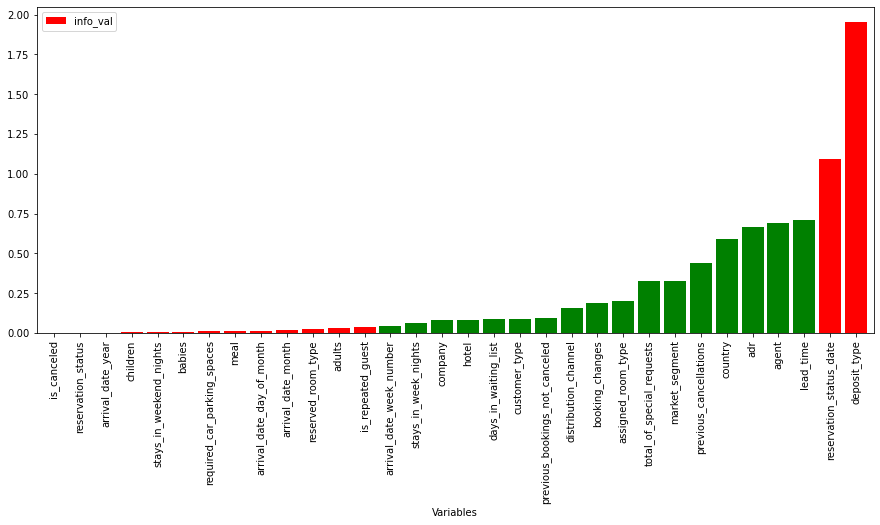

In [11]:
#Visualize the Information Values
info = pd.DataFrame(list(dct.items()),columns = ['Variables','info_val'])
info_sd = info.sort_values('info_val')
info_sd['good'] = (info_sd['info_val'] >= 0.04) & (info_sd['info_val'] <= 0.75)
ax = info_sd.plot.bar(x='Variables', y='info_val', rot=90, figsize=(15,6), width=0.85, color=info_sd.good.map({True: 'g', False: 'r'}))


Variables that have a IV less than 0.4 are consided to be weak and will not be use in  the prediction model. Similarly variables that have IV greater than 0.6 are considered "suspicious or too good to be true" and will be excluded from the prediction model. Green is used to highlight the variables that are good for the prediction model and these variables falls between 0.04 and 0.6 information value.

In [9]:
#Replace categorical variables string values to integer values 
modeling_df = bookings_df
cats = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment','distribution_channel','reserved_room_type',
    'assigned_room_type','deposit_type','customer_type']
for col in cats:
    modeling_df[col],_ = pd.factorize(modeling_df[col])

modeling_df.insert(0, 'is_canceled', modeling_df.pop('is_canceled'))

In [10]:
#Use all variable is decision tree model
X = modeling_df.iloc[:,1:30]
y = modeling_df.iloc[:,0]
#split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train the decision tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 8824
Accuracy: 0.75


Using all variables in hotel bookings dataset, the algorithm was able to predict a classification acuracy of 75% from the decision tree model. 8,824 samples was classified as misclassified

In [11]:
#Using 
feature_cols = ['arrival_date_week_number','stays_in_week_nights','company','hotel','days_in_waiting_list','customer_type',
                'previous_bookings_not_canceled','distribution_channel','booking_changes','assigned_room_type',
                'total_of_special_requests','market_segment','previous_cancellations','country','agent','adr','lead_time']
X = bookings_df[feature_cols] # Features
y = bookings_df.is_canceled # Target variable
#split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train the decision tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 8399
Accuracy: 0.77


Using all the selected information values that are classified as important for the modeling, the algorithm was able to predict a classification acuracy of 77% from the hotel bookings dataset. 8,399 samples was classified as misclassified

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver= 'saga', max_iter = 10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20049  2322]
 [ 5894  7552]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     22371
           1       0.76      0.56      0.65     13446

    accuracy                           0.77     35817
   macro avg       0.77      0.73      0.74     35817
weighted avg       0.77      0.77      0.76     35817

